In [4]:
# Imports

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from atom import ATOMClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
# Import the data
df_issues = pd.read_json('issues.json')
df_prs = pd.read_json('pulls.json')
df_releases = pd.read_json('releases.json')

In [6]:
# Cleanup

df_issues = df_issues.replace(r'\r+|\n+|\t+','', regex=True) # newlines, tabs
df_issues = df_issues.replace(r'<[^>]*>', '', regex=True) # html tags
df_issues = df_issues.replace(r"```.*?```", '', regex=True) # markdown code tags

df_prs = df_prs.replace(r'\r+|\n+|\t+','', regex=True)
df_prs = df_prs.replace(r'<[^>]*>', '', regex=True)
df_prs = df_prs.replace(r"```.*?```", '', regex=True)

df_releases = df_releases.replace(r'\r+|\n+|\t+','', regex=True)
df_releases = df_releases.replace(r'<[^>]*>', '', regex=True)
df_releases = df_releases.replace(r"```.*?```", '', regex=True)

In [7]:
df_issues.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,updated_at,closed_at,author_association,active_lock_reason,body,reactions,timeline_url,performed_via_github_app,draft,pull_request
0,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://github.com/microsoft/vscode/issues/138445,1071237047,I_kwDOAn8RLM4_2ce3,138445,program not running,...,2021-12-04 16:06:29+00:00,NaT,NONE,None,I made a program in c++ and ran it but it did...,{'url': 'https://api.github.com/repos/microsof...,https://api.github.com/repos/microsoft/vscode/...,NaN,NaN,NaN
1,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://github.com/microsoft/vscode/issues/138444,1071227805,I_kwDOAn8RLM4_2aOd,138444,VSCode is undefined in debug console when debu...,...,2021-12-04 16:06:30+00:00,NaT,NONE,None,Version info:Steps to Reproduce:1. clone repos...,{'url': 'https://api.github.com/repos/microsof...,https://api.github.com/repos/microsoft/vscode/...,NaN,NaN,NaN
2,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://github.com/microsoft/vscode/issues/138443,1071208220,I_kwDOAn8RLM4_2Vcc,138443,Terminal can't close,...,2021-12-04 14:06:04+00:00,NaT,NONE,None,Version info:Steps to Reproduce:1.clone reposi...,{'url': 'https://api.github.com/repos/microsof...,https://api.github.com/repos/microsoft/vscode/...,NaN,NaN,NaN
3,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://github.com/microsoft/vscode/issues/138442,1071207670,I_kwDOAn8RLM4_2VT2,138442,cannot close dirty file after join / split in ...,...,2021-12-04 14:06:05+00:00,NaT,NONE,None,Does this issue occur when all extensions are ...,{'url': 'https://api.github.com/repos/microsof...,https://api.github.com/repos/microsoft/vscode/...,NaN,NaN,NaN
4,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://github.com/microsoft/vscode/issues/138440,1071179490,I_kwDOAn8RLM4_2Obi,138440,Git SSH authorization,...,2021-12-04 11:06:30+00:00,NaT,NONE,None,Issue Type: BugWhen i use push/pull button in ...,{'url': 'https://api.github.com/repos/microsof...,https://api.github.com/repos/microsoft/vscode/...,NaN,NaN,NaN


In [8]:
df_issues['labels'].values.size

135172

In [9]:
df_no_labels = df_issues[df_issues.labels.str.len() == 0]
len(df_no_labels)

24762

In [10]:
df_no_body = df_issues[df_issues['body'] == '']
len(df_no_body)

2387

In [11]:
df_prs

,url,id,node_id,html_url,diff_url,patch_url,issue_url,number,state,locked,...,review_comments_url,review_comment_url,comments_url,statuses_url,head,base,_links,author_association,auto_merge,active_lock_reason
0,https://api.github.com/repos/microsoft/vscode/...,795014734,PR_kwDOAn8RLM4vYvZO,https://github.com/microsoft/vscode/pull/138430,https://github.com/microsoft/vscode/pull/13843...,https://github.com/microsoft/vscode/pull/13843...,https://api.github.com/repos/microsoft/vscode/...,138430,open,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,"{'label': 'ssigwart:regexSearch', 'ref': 'rege...","{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,CONTRIBUTOR,None,None
1,https://api.github.com/repos/microsoft/vscode/...,794946264,PR_kwDOAn8RLM4vYerY,https://github.com/microsoft/vscode/pull/138428,https://github.com/microsoft/vscode/pull/13842...,https://github.com/microsoft/vscode/pull/13842...,https://api.github.com/repos/microsoft/vscode/...,138428,open,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,{'label': 'microsoft:roblou/fixCellEditorFocus...,"{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None
2,https://api.github.com/repos/microsoft/vscode/...,794798913,PR_kwDOAn8RLM4vX6tB,https://github.com/microsoft/vscode/pull/138419,https://github.com/microsoft/vscode/pull/13841...,https://github.com/microsoft/vscode/pull/13841...,https://api.github.com/repos/microsoft/vscode/...,138419,open,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,"{'label': 'microsoft:merogge/show-focus', 'ref...","{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,CONTRIBUTOR,None,None
3,https://api.github.com/repos/microsoft/vscode/...,794782330,PR_kwDOAn8RLM4vX2p6,https://github.com/microsoft/vscode/pull/138418,https://github.com/microsoft/vscode/pull/13841...,https://github.com/microsoft/vscode/pull/13841...,https://api.github.com/repos/microsoft/vscode/...,138418,open,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,"{'label': 'microsoft:merogge/shell-type', 'ref...","{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,CONTRIBUTOR,None,None
4,https://api.github.com/repos/microsoft/vscode/...,794769298,PR_kwDOAn8RLM4vXzeS,https://github.com/microsoft/vscode/pull/138415,https://github.com/microsoft/vscode/pull/13841...,https://github.com/microsoft/vscode/pull/13841...,https://api.github.com/repos/microsoft/vscode/...,138415,open,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,"{'label': 'Mikay8:comments', 'ref': 'comments'...","{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,NONE,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,https://api.github.com/repos/microsoft/vscode/...,51104496,MDExOlB1bGxSZXF1ZXN0NTExMDQ0OTY=,https://github.com/microsoft/vscode/pull/49,https://github.com/microsoft/vscode/pull/49.diff,https://github.com/microsoft/vscode/pull/49.patch,https://api.github.com/repos/microsoft/vscode/...,49,closed,True,...,https://api.githu

In [12]:
df_prs_no_labels = df_prs[df_prs.labels.str.len() == 0]
len(df_prs_no_labels)

8773

In [13]:
df_prs_no_body = df_prs[df_prs['body'] == '']
len(df_prs_no_body)

1144

In [156]:
def getTitles(column):
    list = []
    for titles in column:
        #titles = titles[1:-1]
        titles = titles.replace("'", "")
        titles = titles.replace('"', "")
        titlesList = titles.split(', ')
        for word in titlesList:
            list.append(word)

    return {i:list.count(i) for i in list}


In [157]:
word_list = getTitles(df_issues['title'])

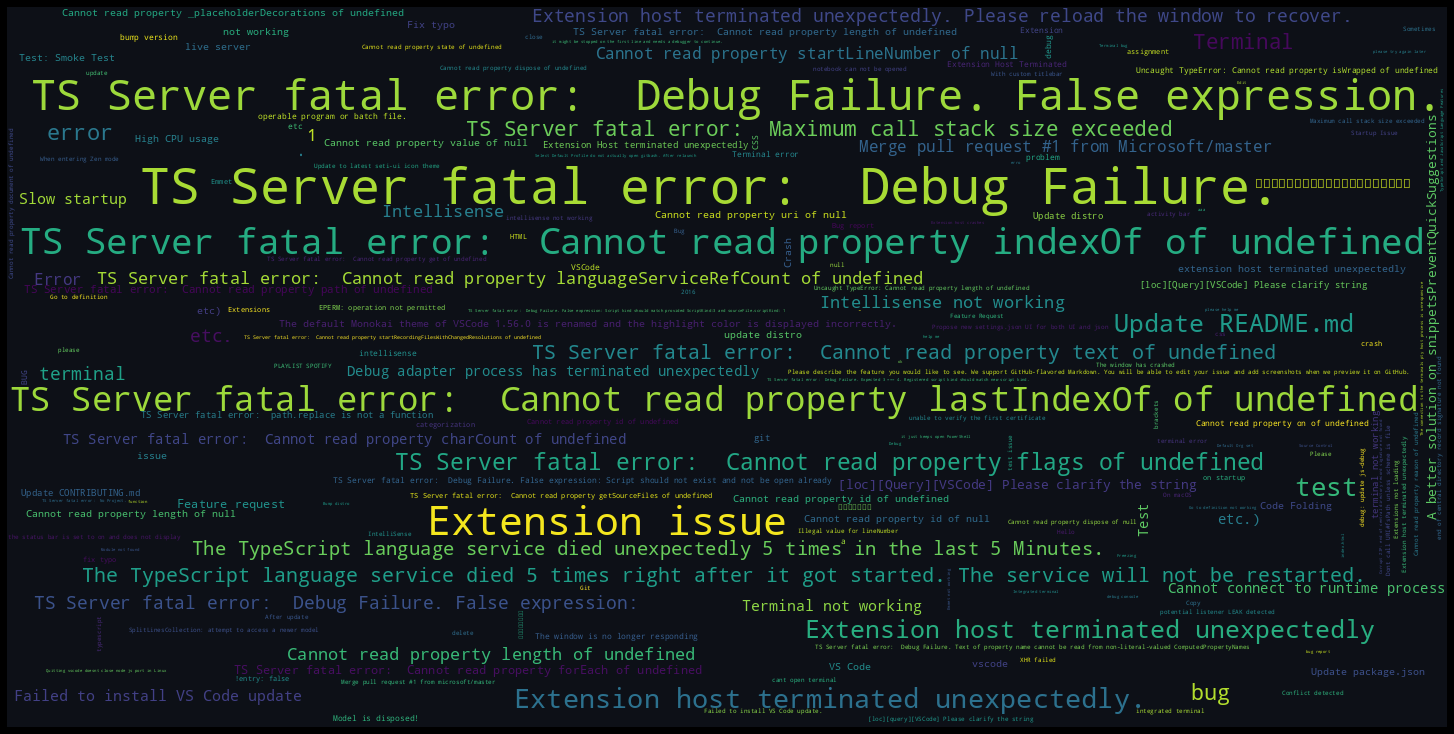

In [158]:


wc = WordCloud(width=1440, height=720, background_color="#0d1017")

wordcloud = wc.generate_from_frequencies(word_list)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [159]:
word_list = getTitles(df_prs['title'])

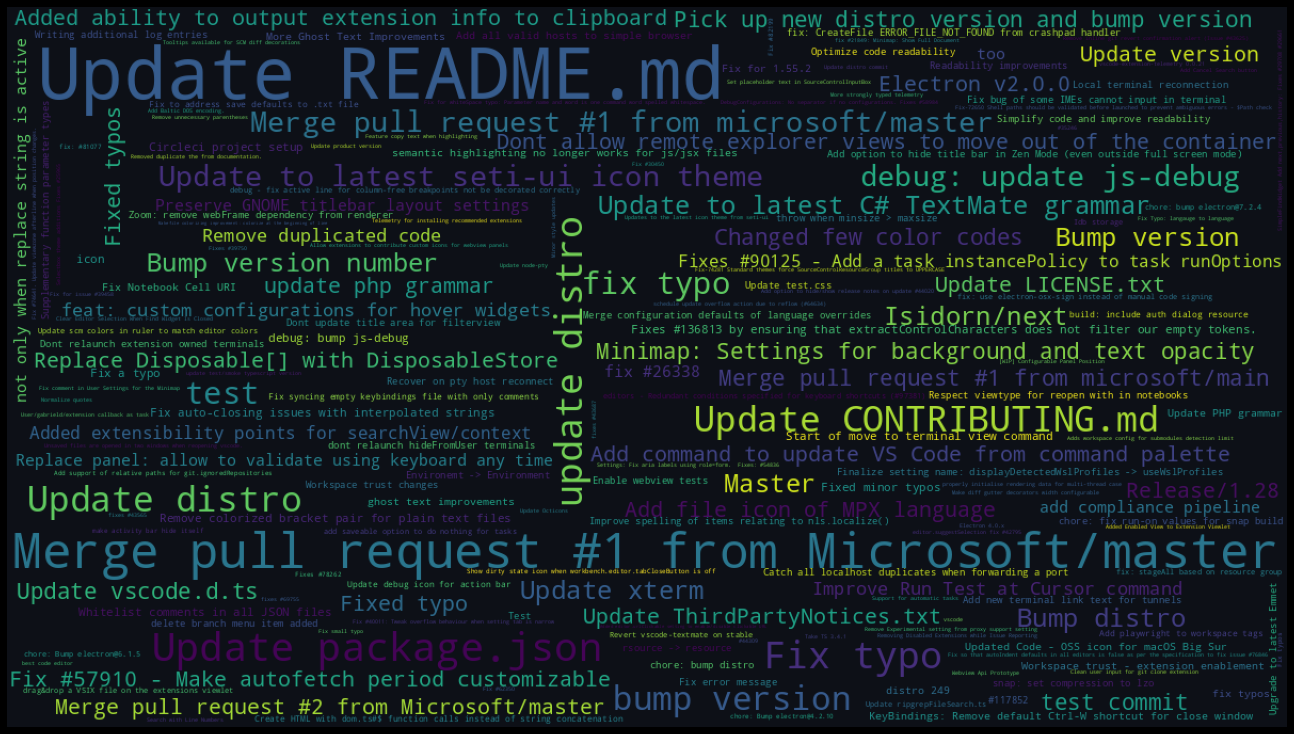

In [160]:

wc = WordCloud(width=1200, height=675, background_color="#0d1017")

wordcloud = wc.generate_from_frequencies(word_list)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [14]:
def clean_dict(x):
    return x['login']

In [15]:
df_prs['user'] = df_prs['user'].apply(clean_dict)

In [16]:
def clean_issues(issues):
    newIssues =[]
    for x in issues:
        if x['name'] != 'feature-request' and x['name'] != 'bug' and x['name'] != 'needs more info':
            newIssues.append(x['name'])
    return newIssues

In [17]:
df_issues['labels'] = df_issues['labels'].apply(clean_issues)

In [18]:
df_issues['labels']

0                 []
1                 []
2                 []
3                 []
4                 []
             ...    
135167    [verified]
135168    [verified]
135169    [verified]
135170            []
135171            []
Name: labels, Length: 135172, dtype: object

In [19]:
df_issues_labels = df_issues[df_issues['labels'].str.len() != 0]

In [20]:
df_issues_labels['labels']

15        [candidate, regression, notebook-cell-editor, ...
19                                      [themes, candidate]
26                                              [important]
27                                               [terminal]
34                                                  [emmet]
                                ...                        
135164                                           [verified]
135166                                           [upstream]
135167                                           [verified]
135168                                           [verified]
135169                                           [verified]
Name: labels, Length: 98348, dtype: object

In [21]:
def get_categories(x):
    all_labels = []
    for labels in x:
       for label in labels:
            all_labels.append(label)
    return {i:all_labels.count(i) for i in all_labels}

In [22]:
categories = get_categories(df_issues['labels'])

In [23]:
categories

{'candidate': 1071,
 'regression': 262,
 'notebook-cell-editor': 15,
 'notebook-triage': 11,
 'themes': 1047,
 'important': 1639,
 'terminal': 6091,
 'emmet': 769,
 'uri': 85,
 'editor-minimap': 187,
 'confirmed': 290,
 'terminal-input': 10,
 'macos': 751,
 'settings-editor': 973,
 'debug': 6656,
 'debt': 2177,
 'tasks': 1763,
 'polish': 1221,
 'terminal-tabs': 272,
 '*english-please': 706,
 'translation-required-thai': 1,
 'extensions': 3156,
 'web': 464,
 'titlebar': 202,
 'layout': 546,
 'workbench-os-integration': 257,
 'translation-required-portuguese-brazil': 40,
 'git': 2489,
 'breadcrumbs': 221,
 'notebook-toc-outline': 8,
 'telemetry': 83,
 'notebook': 1337,
 'upstream': 4108,
 'electron': 1046,
 'workbench-editors': 565,
 'integration-test-failure': 134,
 'formatting': 295,
 'interactive-window': 72,
 'languages-basic': 616,
 'ux': 1540,
 'under-discussion': 1764,
 'scm': 622,
 'markdown': 1171,
 'unit-test-failure': 89,
 'inline-completions': 50,
 'suggest': 975,
 'quick-pic

In [24]:
{k: v for k, v in sorted(categories.items(), reverse=True, key=lambda item: item[1])}

{'verified': 21486,
 '*duplicate': 18441,
 'debug': 6656,
 'terminal': 6091,
 '*caused-by-extension': 5784,
 'insiders-released': 5503,
 '*out-of-scope': 4277,
 '*question': 4188,
 'upstream': 4108,
 'javascript': 3376,
 'extensions': 3156,
 'verification-needed': 2933,
 '*as-designed': 2883,
 'typescript': 2703,
 'git': 2489,
 'debt': 2177,
 'search': 1976,
 'help wanted': 1968,
 'api': 1923,
 'file-explorer': 1788,
 'testplan-item': 1781,
 'under-discussion': 1764,
 'tasks': 1763,
 '*extension-candidate': 1731,
 'important': 1639,
 'ux': 1540,
 'accessibility': 1452,
 'windows': 1365,
 'invalid': 1357,
 'notebook': 1337,
 'polish': 1221,
 'freeze-slow-crash-leak': 1199,
 'on-testplan': 1180,
 'markdown': 1171,
 'linux': 1168,
 'candidate': 1071,
 'install-update': 1060,
 'themes': 1047,
 'electron': 1046,
 'suggest': 975,
 'settings-editor': 973,
 '*not-reproducible': 913,
 'emmet': 769,
 'editor-find': 763,
 'macos': 751,
 'quick-pick': 725,
 'webview': 716,
 '*english-please': 706,

In [25]:
issues_of_interest = ["terminal", "extensions", "typescript", "search", "api", "file-explorer"]

In [26]:
df_prs['issues_lables'] = [[]]*len(df_prs)

In [27]:
df_prs

,url,id,node_id,html_url,diff_url,patch_url,issue_url,number,state,locked,...,review_comment_url,comments_url,statuses_url,head,base,_links,author_association,auto_merge,active_lock_reason,issues_lables
0,https://api.github.com/repos/microsoft/vscode/...,795014734,PR_kwDOAn8RLM4vYvZO,https://github.com/microsoft/vscode/pull/138430,https://github.com/microsoft/vscode/pull/13843...,https://github.com/microsoft/vscode/pull/13843...,https://api.github.com/repos/microsoft/vscode/...,138430,open,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,"{'label': 'ssigwart:regexSearch', 'ref': 'rege...","{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,CONTRIBUTOR,None,None,[]
1,https://api.github.com/repos/microsoft/vscode/...,794946264,PR_kwDOAn8RLM4vYerY,https://github.com/microsoft/vscode/pull/138428,https://github.com/microsoft/vscode/pull/13842...,https://github.com/microsoft/vscode/pull/13842...,https://api.github.com/repos/microsoft/vscode/...,138428,open,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,{'label': 'microsoft:roblou/fixCellEditorFocus...,"{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None,[]
2,https://api.github.com/repos/microsoft/vscode/...,794798913,PR_kwDOAn8RLM4vX6tB,https://github.com/microsoft/vscode/pull/138419,https://github.com/microsoft/vscode/pull/13841...,https://github.com/microsoft/vscode/pull/13841...,https://api.github.com/repos/microsoft/vscode/...,138419,open,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,"{'label': 'microsoft:merogge/show-focus', 'ref...","{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,CONTRIBUTOR,None,None,[]
3,https://api.github.com/repos/microsoft/vscode/...,794782330,PR_kwDOAn8RLM4vX2p6,https://github.com/microsoft/vscode/pull/138418,https://github.com/microsoft/vscode/pull/13841...,https://github.com/microsoft/vscode/pull/13841...,https://api.github.com/repos/microsoft/vscode/...,138418,open,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,"{'label': 'microsoft:merogge/shell-type', 'ref...","{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,CONTRIBUTOR,None,None,[]
4,https://api.github.com/repos/microsoft/vscode/...,794769298,PR_kwDOAn8RLM4vXzeS,https://github.com/microsoft/vscode/pull/138415,https://github.com/microsoft/vscode/pull/13841...,https://github.com/microsoft/vscode/pull/13841...,https://api.github.com/repos/microsoft/vscode/...,138415,open,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,"{'label': 'Mikay8:comments', 'ref': 'comments'...","{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,NONE,None,None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,https://api.github.com/repos/microsoft/vscode/...,51104496,MDExOlB1bGxSZXF1ZXN0NTExMDQ0OTY=,https://github.com/microsoft/vscode/pull/49,https://github.com/microsoft/vscode/pull/49.diff,https://github.com/microsoft/vscode/pull/49.patch,https://api.github.com/repos/microsoft/vscode/...,49,closed,True,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,{'label': 'augustoproiete-forks:fix-typo-parti...,"{'label': 'microsoft:master', 'ref': 'master',...",{'self

In [28]:
# Select only merged PRs
df_prs_closed = df_prs[df_prs['merged_at'].notna()]

In [29]:
df_prs_closed = df_prs_closed.sort_values(by=['merged_at'],ascending=False)

In [30]:
df_prs_closed

,url,id,node_id,html_url,diff_url,patch_url,issue_url,number,state,locked,...,review_comment_url,comments_url,statuses_url,head,base,_links,author_association,auto_merge,active_lock_reason,issues_lables
256,https://api.github.com/repos/microsoft/vscode/...,790567361,PR_kwDOAn8RLM4vHxnB,https://github.com/microsoft/vscode/pull/138042,https://github.com/microsoft/vscode/pull/13804...,https://github.com/microsoft/vscode/pull/13804...,https://api.github.com/repos/microsoft/vscode/...,138042,closed,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,{'label': 'microsoft:hediet/allowedCharactersR...,"{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None,[]
251,https://api.github.com/repos/microsoft/vscode/...,792934078,PR_kwDOAn8RLM4vQza-,https://github.com/microsoft/vscode/pull/138283,https://github.com/microsoft/vscode/pull/13828...,https://github.com/microsoft/vscode/pull/13828...,https://api.github.com/repos/microsoft/vscode/...,138283,closed,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,{'label': 'microsoft:dev/joyceerhl/tarball-pro...,"{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,CONTRIBUTOR,None,None,[]
246,https://api.github.com/repos/microsoft/vscode/...,793561126,PR_kwDOAn8RLM4vTMgm,https://github.com/microsoft/vscode/pull/138333,https://github.com/microsoft/vscode/pull/13833...,https://github.com/microsoft/vscode/pull/13833...,https://api.github.com/repos/microsoft/vscode/...,138333,closed,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,"{'label': 'microsoft:alexr00/cancelPromise', '...","{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None,[]
248,https://api.github.com/repos/microsoft/vscode/...,793051136,PR_kwDOAn8RLM4vRQAA,https://github.com/microsoft/vscode/pull/138293,https://github.com/microsoft/vscode/pull/13829...,https://github.com/microsoft/vscode/pull/13829...,https://api.github.com/repos/microsoft/vscode/...,138293,closed,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,{'label': 'microsoft:lszomoru/open-changes-com...,"{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None,[]
247,https://api.github.com/repos/microsoft/vscode/...,793210167,PR_kwDOAn8RLM4vR203,https://github.com/microsoft/vscode/pull/138302,https://github.com/microsoft/vscode/pull/13830...,https://github.com/microsoft/vscode/pull/13830...,https://api.github.com/repos/microsoft/vscode/...,138302,closed,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,{'label': 'microsoft:sandy081/perf-delayUpdati...,"{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10796,https://api.github.com/repos/microsoft/vscode/...,51136002,MDExOlB1bGxSZXF1ZXN0NTExMzYwMDI=,https://github.com/microsoft/vscode/pull/97,https://github.com/microsoft/vscode/pull/97.diff,https://github.com/microsoft/vscode/pull/97.patch,https://api.github.com/repos/microsoft/vscode/...,97,closed,True,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,"{'label': 'Enet4:bug/grunt-task-detector', 're...","{'label': 'microsoft:master', 'ref': 'master',...

In [31]:
df_issues_labels = df_issues_labels.sort_values(by=['created_at'],ascending=False)

In [32]:
df_issues_labels

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,updated_at,closed_at,author_association,active_lock_reason,body,reactions,timeline_url,performed_via_github_app,draft,pull_request
5367,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://github.com/microsoft/vscode/issues/138441,1071195237,I_kwDOAn8RLM4_2SRl,138441,Extension Not working Properly,...,2021-12-04 16:42:19+00:00,2021-12-04 16:42:19+00:00,NONE,None,We have written the needed data into your clip...,{'url': 'https://api.github.com/repos/microsof...,https://api.github.com/repos/microsoft/vscode/...,NaN,NaN,NaN
15,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://github.com/microsoft/vscode/issues/138427,1070989988,I_kwDOAn8RLM4_1gKk,138427,Notebook cell focus is not restored when edito...,...,2021-12-03 22:03:19+00:00,NaT,MEMBER,None,- Focus the editor of a code cell- ctrl+tab to...,{'url': 'https://api.github.com/repos/microsof...,https://api.github.com/repos/microsoft/vscode/...,NaN,NaN,NaN
5369,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://github.com/microsoft/vscode/issues/138423,1070868751,I_kwDOAn8RLM4_1CkP,138423,Not getting Warnings,...,2021-12-03 19:01:04+00:00,2021-12-03 19:01:04+00:00,NONE,None,We have written the needed data into your clip...,{'url': 'https://api.github.com/repos/microsof...,https://api.github.com/repos/microsoft/vscode/...,NaN,NaN,NaN
19,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://github.com/microsoft/vscode/issues/138422,1070860031,I_kwDOAn8RLM4_1Ab_,138422,Editor in new folder is opened with wrong theme,...,2021-12-03 20:49:29+00:00,NaT,MEMBER,None,- Open a new folder- Trust the workspace- Some...,{'url': 'https://api.github.com/repos/microsof...,https://api.github.com/repos/microsoft/vscode/...,NaN,NaN,NaN
5373,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://github.com/microsoft/vscode/issues/138411,1070725690,I_kwDOAn8RLM4_0fo6,138411,Allow creation of new folder (especially remote),...,2021-12-03 22:02:54+00:00,2021-12-03 22:02:53+00:00,NONE,None,Imagine a user opening VSCode. They want to st...,{'url': 'https://api.github.com/repos/microsof...,https://api.github.com/repos/microsoft/vscode/...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135164,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://github.com/microsoft/vscode/issues/8,116923175,MDU6SXNzdWUxMTY5MjMxNzU=,8,"Flash between opening of workspaces, reload",...,2017-11-18 21:50:40+00:00,2015-11-19 10:26:08+00:00,MEMBER,None,start codeset a dark theme _other than the def...,{'url': 'https://api.github.com/repos/microsof...,https://api.github.com/repos/microsoft/vscode/...,NaN,NaN,NaN
135166,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microso

In [33]:
df_issues_labels_reduced = df_issues_labels

def get_labels(df_issues_labels_reduced, date):
    label_list = []
    for index, issue in enumerate(df_issues_labels_reduced['created_at']):
        if(issue >= date):
            label_list = label_list + df_issues_labels_reduced['labels'].iloc[index]
        else:
            df_issues_labels_reduced.drop(df_issues_labels_reduced.index[0:index], inplace=True)
            break
    return label_list

def assign_labels(df):
    for index, date in enumerate(df['merged_at']):
        labels = get_labels(df_issues_labels_reduced, date)
        df['issues_lables'].iloc[index] = labels

In [34]:
df_prs_closed_test = df_prs_closed

assign_labels(df_prs_closed_test)

In [35]:
df_prs_closed_test

,url,id,node_id,html_url,diff_url,patch_url,issue_url,number,state,locked,...,review_comment_url,comments_url,statuses_url,head,base,_links,author_association,auto_merge,active_lock_reason,issues_lables
256,https://api.github.com/repos/microsoft/vscode/...,790567361,PR_kwDOAn8RLM4vHxnB,https://github.com/microsoft/vscode/pull/138042,https://github.com/microsoft/vscode/pull/13804...,https://github.com/microsoft/vscode/pull/13804...,https://api.github.com/repos/microsoft/vscode/...,138042,closed,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,{'label': 'microsoft:hediet/allowedCharactersR...,"{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None,"[*caused-by-extension, candidate, regression, ..."
251,https://api.github.com/repos/microsoft/vscode/...,792934078,PR_kwDOAn8RLM4vQza-,https://github.com/microsoft/vscode/pull/138283,https://github.com/microsoft/vscode/pull/13828...,https://github.com/microsoft/vscode/pull/13828...,https://api.github.com/repos/microsoft/vscode/...,138283,closed,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,{'label': 'microsoft:dev/joyceerhl/tarball-pro...,"{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,CONTRIBUTOR,None,None,"[*duplicate, editor-minimap, confirmed, termin..."
246,https://api.github.com/repos/microsoft/vscode/...,793561126,PR_kwDOAn8RLM4vTMgm,https://github.com/microsoft/vscode/pull/138333,https://github.com/microsoft/vscode/pull/13833...,https://github.com/microsoft/vscode/pull/13833...,https://api.github.com/repos/microsoft/vscode/...,138333,closed,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,"{'label': 'microsoft:alexr00/cancelPromise', '...","{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None,"[workbench-os-integration, *english-please, tr..."
248,https://api.github.com/repos/microsoft/vscode/...,793051136,PR_kwDOAn8RLM4vRQAA,https://github.com/microsoft/vscode/pull/138293,https://github.com/microsoft/vscode/pull/13829...,https://github.com/microsoft/vscode/pull/13829...,https://api.github.com/repos/microsoft/vscode/...,138293,closed,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,{'label': 'microsoft:lszomoru/open-changes-com...,"{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None,"[*caused-by-extension, debt]"
247,https://api.github.com/repos/microsoft/vscode/...,793210167,PR_kwDOAn8RLM4vR203,https://github.com/microsoft/vscode/pull/138302,https://github.com/microsoft/vscode/pull/13830...,https://github.com/microsoft/vscode/pull/13830...,https://api.github.com/repos/microsoft/vscode/...,138302,closed,False,...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,https://api.github.com/repos/microsoft/vscode/...,{'label': 'microsoft:sandy081/perf-delayUpdati...,"{'label': 'microsoft:main', 'ref': 'main', 'sh...",{'self': {'href': 'https://api.github.com/repo...,MEMBER,None,None,"[debug, *duplicate, *duplicate, breadcrumbs, n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10796,https://api.github.com/repos/microsoft/vscode/...,51136002,MDExOlB1bGxSZXF1ZXN0NTExMzYwMDI=,https://github.com/microsoft/vscode/pull/97,https://github.com/microsoft/vscode/pull/97.diff,https://github.com/microsoft/vscode/pull/97.patch,https://api.github.com/repos/microsoft/vscode/...,97,closed,True,...,https://api.github.com/repos

In [40]:
df_prs_closed_test['main_issue'] = ''
df_prs_closed_test['verified'] = 0

In [41]:
def get_main_issue(df):
    for index, labels in enumerate(df['issues_lables']):
        issues_dictionary = {}
        verified = 0
        for label in labels:
            if label in issues_of_interest:
                issues_dictionary[label] = df['issues_lables'].iloc[index].count(label)
            elif label == 'verified':
                verified += 1
        if len(issues_dictionary) > 0:
            main_item = max(issues_dictionary, key=issues_dictionary.get)
            df['main_issue'].iloc[index] = main_item
            df['verified'].iloc[index] = verified

In [42]:
get_main_issue(df_prs_closed_test)

In [111]:
df_prs_closed_test['verified'].sort_values(ascending=False)

10570    154
3962     153
10627    120
10337    112
7787     106
        ... 
7539       0
4278       0
4248       0
4246       0
5224       0
Name: verified, Length: 7819, dtype: int64

In [44]:
df_prs_closed_test['main_issue_category'] = df_prs_closed_test['main_issue'].astype("category")

In [45]:
df_prs_closed_test.dtypes

url                                 object
id                                   int64
node_id                             object
html_url                            object
diff_url                            object
patch_url                           object
issue_url                           object
number                               int64
state                               object
locked                                bool
title                               object
user                                object
body                                object
created_at             datetime64[ns, UTC]
updated_at             datetime64[ns, UTC]
closed_at              datetime64[ns, UTC]
merged_at              datetime64[ns, UTC]
merge_commit_sha                    object
assignee                            object
assignees                           object
requested_reviewers                 object
requested_teams                     object
labels                              object
milestone  

In [113]:
data = [df_prs_closed_test['body'], df_prs_closed_test['main_issue_category']]
new_df = pd.DataFrame()
new_df['corpus'] = df_prs_closed_test['body']
new_df['target'] = df_prs_closed_test['verified']
le = LabelEncoder()

label = le.fit_transform(new_df['target'])
new_df.drop('target', axis=1, inplace=True)
new_df['target'] = label

In [114]:
def classify_target(x):
    if x == 0:
        return 0
    else:
        return 1

In [115]:
new_df['corpus'].isnull().sum()

40

In [116]:
new_df.dropna(subset=['corpus'], inplace=True)

In [117]:
new_df['target'] = new_df['target'].apply(classify_target)

<AxesSubplot:>

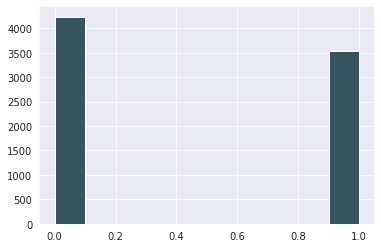

In [118]:
new_df['target'].hist()

In [119]:
atom = ATOMClassifier(new_df, "target", test_size=0.2, verbose=2)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (7779, 2)
Memory: 2.69 MB
Scaled: False
Missing values: 795 (5.1%)
Categorical features: 1 (100.0%)
Duplicate samples: 886 (11.4%)
-------------------------------------
Train set size: 6224
Test set size: 1555
-------------------------------------
|   |      dataset |        train |         test |
| - | ------------ | ------------ | ------------ |
| 0 |   4236 (1.2) |   3389 (1.2) |    847 (1.2) |
| 1 |   3543 (1.0) |   2835 (1.0) |    708 (1.0) |



In [120]:
atom.dataset

,corpus,target
0,This PR fixes #5446,1
1,Implements https://github.com/microsoft/vscode...,0
2,This PR makes the suggest widget (list of comp...,1
3,Reverts Microsoft/vscode#53534,1
4,This is a fix for #62003.This fixes a UX probl...,0
...,...,...
7774,The goal of this PR is to extract the color re...,1
7775,I digged into the debugging code and found som...,1
7776,Fixes #73241,0
7777,,0


In [121]:
atom.textclean()

Cleaning the corpus...
 --> Decoding unicode characters to ascii.
 --> Converting text to lower case.
 --> Dropping 7 emails from 7 documents.
 --> Dropping 3068 URL links from 1984 documents.
 --> Dropping 0 HTML tags from 0 documents.
 --> Dropping 47 emojis from 43 documents.
 --> Dropping 7453 numbers from 3968 documents.
 --> Dropping punctuation from the text.


In [122]:
atom.tokenize()

Tokenizing the corpus...


In [123]:
atom.corpus

0                                       [this, pr, fixes]
1       [implements, x, creating, a, new, toplevel, fi...
2       [this, pr, makes, the, suggest, widget, list, ...
3                              [reverts, microsoftvscode]
4       [this, is, a, fix, for, this, fixes, a, ux, pr...
                              ...                        
7774    [the, goal, of, this, pr, is, to, extract, the...
7775    [i, digged, into, the, debugging, code, and, f...
7776                                              [fixes]
7777                                                   []
7778    [this, pr, refs, 85164in, order, for, this, to...
Name: corpus, Length: 7779, dtype: object

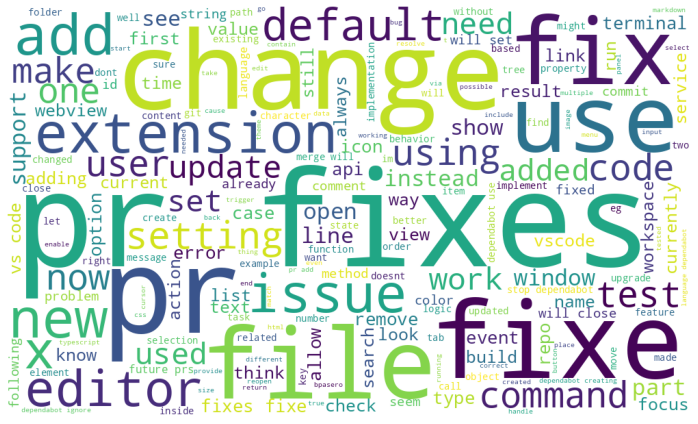

In [124]:
atom.plot_wordcloud()

In [125]:
atom.normalize(stopwords="english", lemmatize=True)

Normalizing the corpus...
 --> Dropping stopwords.
 --> Applying lemmatization.


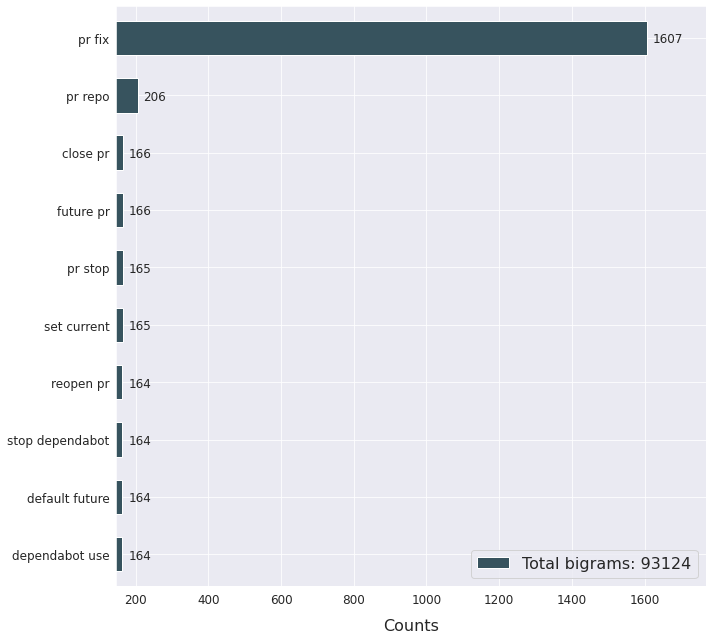

In [126]:
atom.plot_ngrams(ngram=2)

In [127]:
atom.tokenize(bigram_freq=150)

Tokenizing the corpus...
 --> Creating 10 bigrams on 3131 locations.


In [128]:
atom.vectorize(strategy="tfidf")

Fitting Vectorizer...
Vectorizing the corpus...


In [129]:
atom.shape

(7779, 14808)

In [130]:
atom.dataset.dtypes

000msrecording    Sparse[float64, 0]
0034problem       Sparse[float64, 0]
0074e8            Sparse[float64, 0]
00ms              Sparse[float64, 0]
010additional     Sparse[float64, 0]
                         ...        
zshenv            Sparse[float64, 0]
zshrc             Sparse[float64, 0]
zshtheme          Sparse[float64, 0]
预期的文件结尾           Sparse[float64, 0]
target                         int64
Length: 14808, dtype: object

In [131]:
atom.available_models()

,acronym,fullname,estimator,module,needs_scaling,accepts_sparse,supports_gpu
0,Dummy,Dummy Estimator,DummyClassifier,sklearn.dummy,False,False,False
1,GP,Gaussian Process,GaussianProcessClassifier,sklearn.gaussian_process._gpc,False,False,False
2,GNB,Gaussian Naive Bayes,GaussianNB,sklearn.naive_bayes,False,False,True
3,MNB,Multinomial Naive Bayes,MultinomialNB,sklearn.naive_bayes,False,True,True
4,BNB,Bernoulli Naive Bayes,BernoulliNB,sklearn.naive_bayes,False,True,True
5,CatNB,Categorical Naive Bayes,CategoricalNB,sklearn.naive_bayes,False,True,True
6,CNB,Complement Naive Bayes,ComplementNB,sklearn.naive_bayes,False,True,False
7,Ridge,Ridge Estimator,RidgeClassifier,sklearn.linear_model._ridge,True,True,True
8,Perc,Perceptron,Perceptron,sklearn.linear_model._perceptron,True,False,False
9,LR,Logistic Regression,LogisticRegression,sklearn.linear_model._logistic,True,True,True


In [132]:
atom.run(models="RF", metric="f1_weighted")


Training ========================= >>
Models: RF
Metric: f1_weighted


Results for Random Forest:
Fit ---------------------------------------------
Train evaluation --> f1_weighted: 0.8495
Test evaluation --> f1_weighted: 0.5119
Time elapsed: 28.262s
-------------------------------------------------
Total time: 28.262s


Final results ==================== >>
Duration: 28.262s
-------------------------------------
Random Forest --> f1_weighted: 0.5119 ~


In [133]:
atom.evaluate()

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
RF,0.548553,0.486111,0.524287,0.337736,0.203178,0.057805,0.508523,0.252825,0.547036


Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


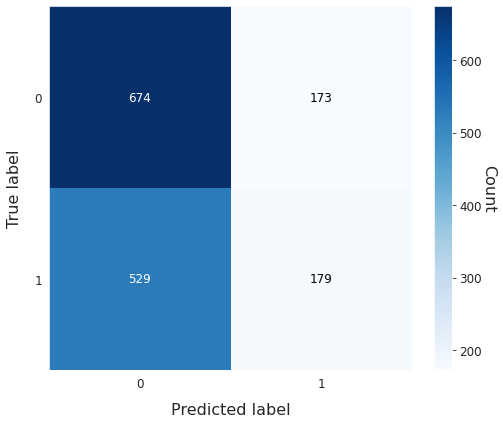

In [134]:
atom.plot_confusion_matrix()